In [ ]:
#!pip install alpaca-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.7 MB/s eta 0:00:00


## Gathering financial data

In [2]:
from alpaca.data import StockHistoricalDataClient, requests
from datetime import datetime, timedelta
from alpaca.data.timeframe import TimeFrame
import pandas as pd
#import seaborn as sns

# keys required

In [3]:
stock_client = StockHistoricalDataClient("PKSQNNG8GVINE9P4BOCI",  "G7PZXasCjXqnYJYB9QoSiF5iBYQSscn7zexMsfKx")

In [14]:
data = requests.StockBarsRequest(symbol_or_symbols=["AAPL"],
timeframe=TimeFrame.Day,
start=datetime(2022, 7, 1),
end=datetime(2022, 10, 1))

In [17]:
bars = stock_client.get_stock_bars(data)

In [18]:
bars.df.reset_index()

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,AAPL,2022-07-01 04:00:00+00:00,136.040,139.0400,135.660,138.93,77594243.0,557437.0,137.584627
1,AAPL,2022-07-05 04:00:00+00:00,137.770,141.6100,136.930,141.56,79904746.0,601962.0,139.882049
2,AAPL,2022-07-06 04:00:00+00:00,141.355,144.1200,141.080,142.92,78938366.0,585626.0,142.571683
3,AAPL,2022-07-07 04:00:00+00:00,143.290,146.5500,143.280,146.35,72731949.0,539963.0,145.716973
4,AAPL,2022-07-08 04:00:00+00:00,145.265,147.5500,145.000,147.04,68264699.0,518941.0,146.651674
...,...,...,...,...,...,...,...,...,...
59,AAPL,2022-09-26 04:00:00+00:00,149.660,153.7701,149.640,150.77,100616414.0,747669.0,151.455989
60,AAPL,2022-09-27 04:00:00+00:00,152.740,154.7200,149.945,151.76,91032702.0,683779.0,152.114522
61,AAPL,2022-09-28 04:00:00+00:00,147.640,150.6414,144.840,149.84,155823686.0,1142720.0,147.712842
62,AAPL,2022-09-29 04:00:00+00:00,146.100,146.7200,140.680,142.48,137415955.0,1067283.0,142.899605


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

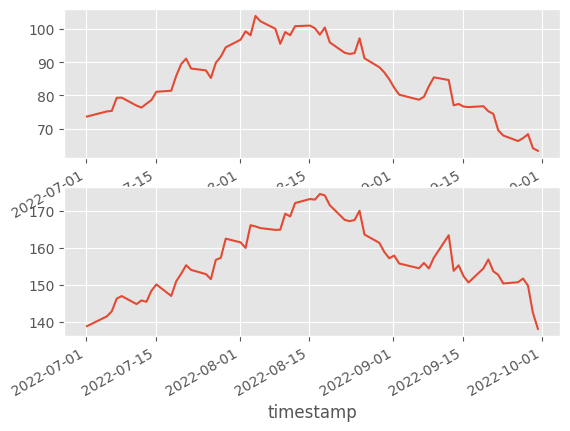

In [ ]:
plt.figure()
plt.subplot(211)
bars.df.loc['AMD']['close'].plot()
plt.subplot(212)
bars.df.loc['AAPL']['close'].plot()
plt.show()

In [ ]:
bars.df.reset_index()

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,AAPL,2022-07-01 04:00:00+00:00,136.040,139.0400,135.6600,138.93,77594243.0,557437.0,137.584627
1,AAPL,2022-07-05 04:00:00+00:00,137.770,141.6100,136.9300,141.56,79904746.0,601962.0,139.882049
2,AAPL,2022-07-06 04:00:00+00:00,141.355,144.1200,141.0800,142.92,78938366.0,585626.0,142.571683
3,AAPL,2022-07-07 04:00:00+00:00,143.290,146.5500,143.2800,146.35,72731949.0,539963.0,145.716973
4,AAPL,2022-07-08 04:00:00+00:00,145.265,147.5500,145.0000,147.04,68264699.0,518941.0,146.651674
...,...,...,...,...,...,...,...,...,...
123,AMD,2022-09-26 04:00:00+00:00,67.870,68.7400,66.2500,66.30,85394994.0,416145.0,67.224166
124,AMD,2022-09-27 04:00:00+00:00,67.900,68.7800,66.0000,67.17,96721670.0,467009.0,67.366288
125,AMD,2022-09-28 04:00:00+00:00,67.110,68.7979,66.5600,68.36,75421032.0,389767.0,68.031954
126,AMD,2022-09-29 04:00:00+00:00,67.150,67.2000,62.8301,64.14,106424560.0,538138.0,64.358146


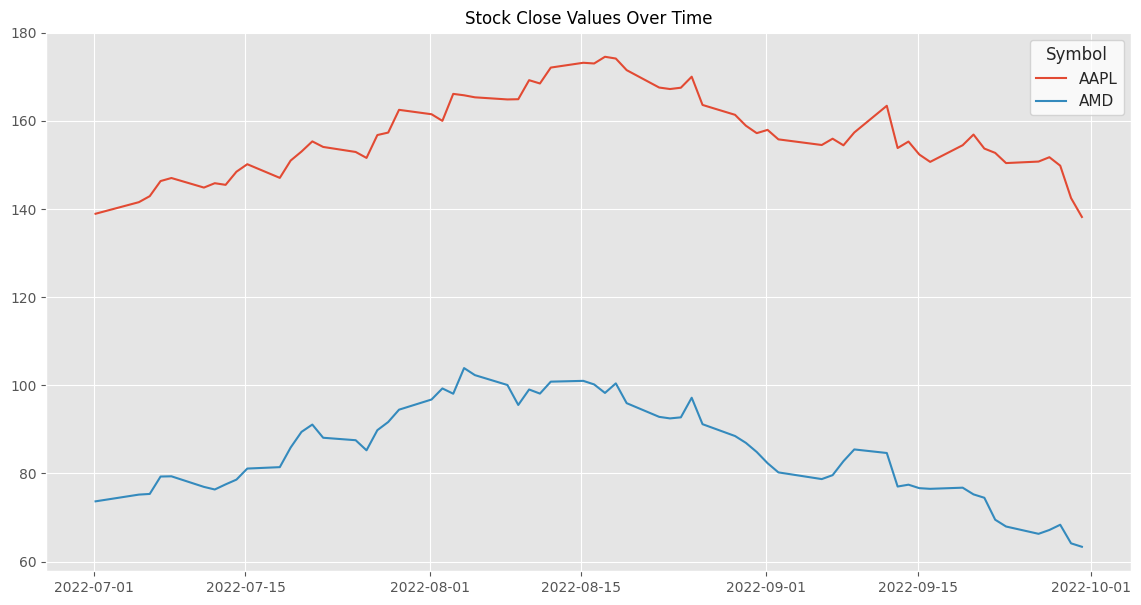

In [ ]:
# Convert the 'timestamp' column to datetime
df_new = bars.df.reset_index()

df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])

# Sort the DataFrame based on the 'timestamp' column
df_new.sort_values('timestamp', inplace=True)

# Set the 'timestamp' column as the DataFrame's index
df_new.set_index('timestamp', inplace=True)

# Plotting the close values for each stock
plt.figure(figsize=(14, 7))

# Assuming we have potentially multiple symbols, we'll plot each one separately
for symbol in df_new['symbol'].unique():
    symbol_data = df_new[df_new['symbol'] == symbol]
    plt.plot(symbol_data.index, symbol_data['close'], label=symbol)

# Use seaborn style
sns.set(style="whitegrid")

# Adding title and legend
plt.title('Stock Close Values Over Time')
plt.legend(title='Symbol')

# Displaying the plot
plt.show()


## Getting log returns

### Log Returns and Their Uses in Finance

A log return is a method of calculating the return on an investment using the natural logarithm. It is defined for a price series \( p_t \) over a time interval from \( t-1 \) to \( t \) as follows:


$$r_t = \ln\left(\frac{p_t}{p_{t-1}}\right) $$
where $ ln $ denotes the natural logarithm.

#### Why Use Log Returns?
Log returns are preferred over absolute or simple returns for several key reasons:

1. **Additivity Across Time**: Log returns can be added across time to compute the total return over a period. This is useful for calculating cumulative returns over various time frames easily.

2. **Normalization**: Log returns help in normalizing percentage changes, making it easier to compare returns across different assets or portfolios.

3. **Symmetry**: Log returns symmetrically account for proportional gains and losses. For example, a 10% gain followed by a 10% loss will mathematically return


<ipython-input-15-fbfbe6738f0f>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_new['log_return'] = df_new.groupby('symbol')['close'].apply(lambda x: np.log(x) - np.log(x.shift(1)))


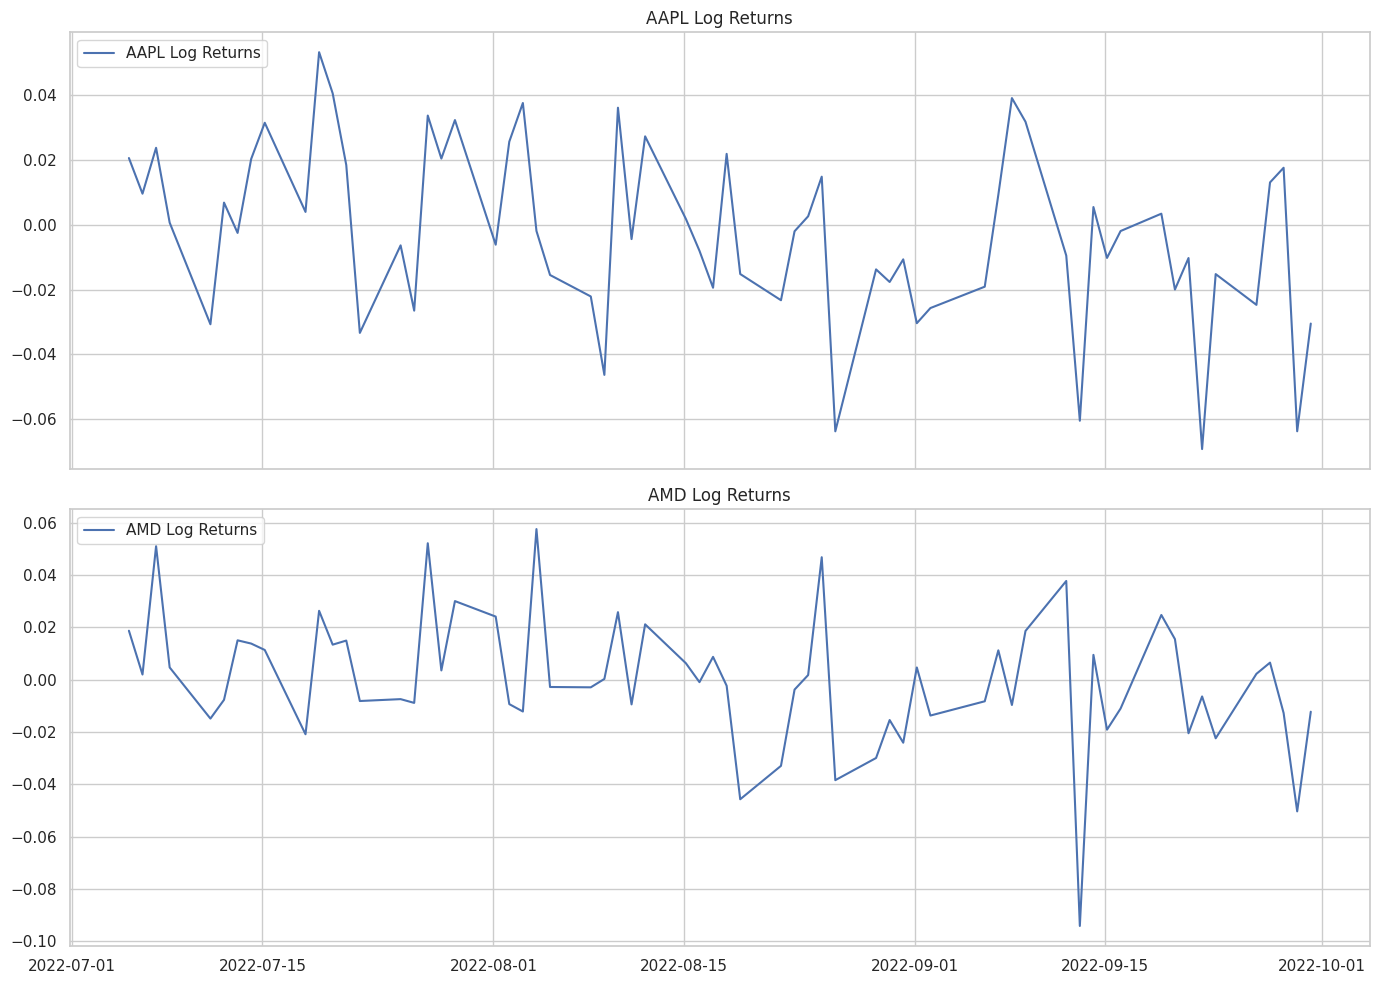

In [ ]:
import numpy as np

# Calculate log returns for each stock
df_new['log_return'] = df_new.groupby('symbol')['close'].apply(lambda x: np.log(x) - np.log(x.shift(1)))

# Creating subplots with shared x-axis
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot log returns for each symbol on a separate subplot
for (i, symbol) in enumerate(df_new['symbol'].unique()):
    symbol_data = df_new[df_new['symbol'] == symbol]
    axs[i].plot(symbol_data.index, symbol_data['log_return'], label=f'{symbol} Log Returns')
    axs[i].set_title(f'{symbol} Log Returns')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)  # Adding grid for better readability

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

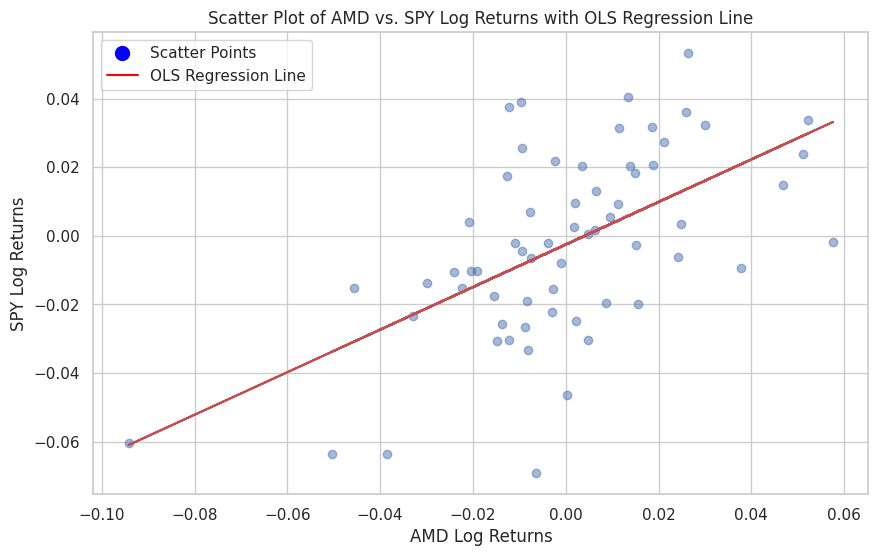

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     30.25
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           7.94e-07
Time:                        13:44:33   Log-Likelihood:                 150.75
No. Observations:                  63   AIC:                            -297.5
Df Residuals:                      61   BIC:                            -293.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0025      0.003     -0.900      0.3

In [ ]:
import statsmodels.api as sm
import matplotlib.lines as mlines

# Filter out the log returns for each stock
amd_log_returns = df_new[df_new['symbol'] == 'AMD']['log_return'].dropna()
spy_log_returns = df_new[df_new['symbol'] == 'AAPL']['log_return'].dropna()

# We need to make sure both series have the same length and the same index for a meaningful correlation analysis
# Align the two series by index
joint_log_returns = amd_log_returns.align(spy_log_returns, join='inner')

# Prepare the data for the scatter plot and regression analysis
x = joint_log_returns[0]  # AMD
y = joint_log_returns[1]  # SPY

# Add a constant to the independent variable for OLS regression
x_with_const = sm.add_constant(x)

# Perform the OLS regression
model = sm.OLS(y, x_with_const)
results = model.fit()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Log Returns')

# Plot the regression line
plt.plot(x, results.predict(x_with_const), 'r', label='OLS Regression Line')

# Set the plot labels and title
plt.xlabel('AMD Log Returns')
plt.ylabel('SPY Log Returns')
plt.title('Scatter Plot of AMD vs. SPY Log Returns with OLS Regression Line')

# Legend to distinguish the scatter points and regression line
legend_elements = [mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Scatter Points'),
                   mlines.Line2D([], [], color='red', label='OLS Regression Line')]
plt.legend(handles=legend_elements)

# Display the plot
plt.show()

# Print out the OLS regression results
print(results.summary())

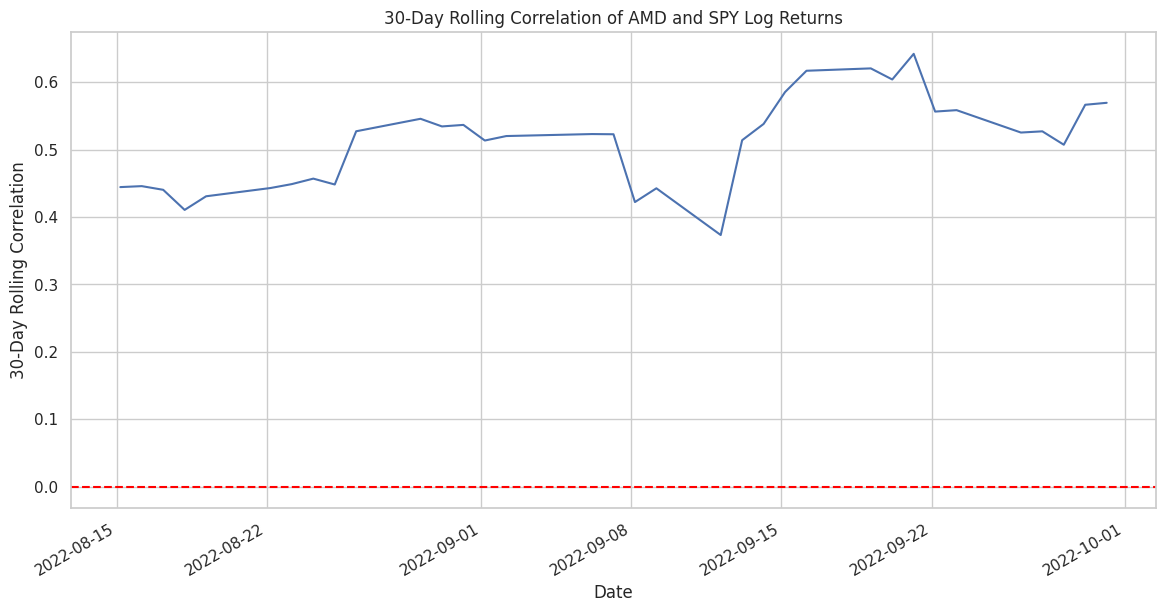

(0.5107538433247399, 0.06671684112598679)

In [ ]:
# Calculate the rolling correlation using a 30-day window, which is a common choice for monthly analysis
rolling_correlation = amd_log_returns.rolling(window=30).corr(spy_log_returns)

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
rolling_correlation.plot(title='30-Day Rolling Correlation of AMD and SPY Log Returns')
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Correlation')
plt.axhline(0, color='red', linestyle='--')  # Zero correlation line for reference
plt.show()

# Some basic conclusions about the result
corr_mean = rolling_correlation.mean()
corr_std = rolling_correlation.std()
corr_mean, corr_std

### RSI EXAMPLE, overbought line

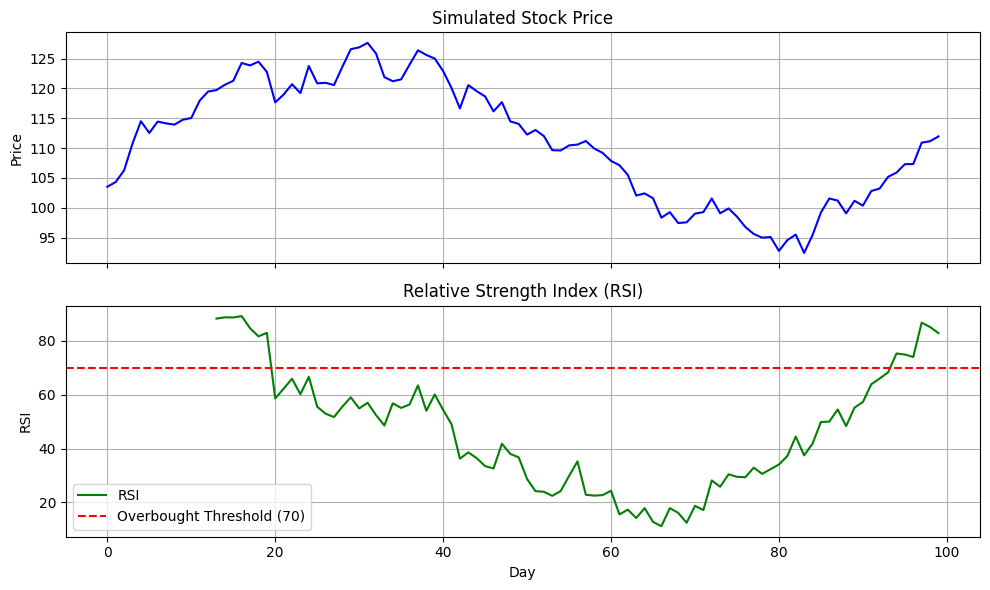

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a simulated stock price data
np.random.seed(0) # For reproducibility
days = 100
price_changes = np.random.randn(days) * 2
prices = 100 + np.cumsum(price_changes) # Starting price at 100

# Calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

rsi = calculate_rsi(pd.Series(prices), 14)

# Plotting the stock price and RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax1.plot(prices, label='Stock Price', color='blue')
ax1.set_title('Simulated Stock Price')
ax1.set_ylabel('Price')
ax1.grid(True)

ax2.plot(rsi, label='RSI', color='green')
ax2.axhline(70, color='red', linestyle='--', label='Overbought Threshold (70)')
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Day')
ax2.grid(True)

ax2.legend()
plt.tight_layout()
plt.show()